distribution of main data

# some variables

In [ ]:
# -------- check or show main dist
# check_working = "check"
check_working = "main_dist"

# Google Colab

In [ ]:
# load data from google drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
!ls "/content/gdrive/My Drive/"

Mounted at /content/gdrive
 1401.06.rar  'Colab Notebooks'


# Libs

In [ ]:
# config
%run '/content/gdrive/My Drive/Colab Notebooks/paper/01- Jupyter Notebook/90- two-phase method - class replace/config.ipynb'

In [ ]:
# functions
%run '/content/gdrive/My Drive/Colab Notebooks/paper/01- Jupyter Notebook/90- two-phase method - class replace/functions.ipynb'

In [ ]:
# classes
%run '/content/gdrive/My Drive/Colab Notebooks/paper/01- Jupyter Notebook/90- two-phase method - class replace/my_classes.ipynb'

In [ ]:
import math
import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# read_dataset_bugs

In [ ]:
df_main = read_dataset_bugs()
print_dataset_info()

Software Name         : Hbase
Number of rows        : 160,524
Number of bug reports : 9,201
Number of classes     : 5,518


In [ ]:
# ------ shrink the dataframe
if check_working == "check":
    my_indices_keep = slice(0, 100)
    df_main = df_main.iloc[my_indices_keep]
    df_main

# repetative class id for each bug
Does each bug report have repetative class id which have different time stamp?

We'll see yes.

In [ ]:
num = 0

def testttt(gg):
    global num
    tempppp = gg["class_id"].tolist()
    temp33 = set(tempppp)
    if len(tempppp) == len(temp33):
        num = num + 1

In [ ]:
temmmm = df_main.groupby("bug_report_id")
temmmm.apply(lambda g: testttt(g))
print(f"{num:,d}")

8,342


# bug_class_predictions

In [ ]:
empty_bug_class_predictions = creat_empty_bug_class_predictions(df_main.copy(), 
                                                                preprocessing_params["label1_th"])
empty_bug_class_predictions

['bug_report_id', 'bug_class_2']
['int64', 'int32']


,bug_report_id,bug_class_2
0,41737,<NA>
1,41748,<NA>
2,41751,<NA>
3,41754,<NA>
4,41757,<NA>
...,...,...
9196,53949,<NA>
9197,53950,<NA>
9198,53951,<NA>
9199,53952,<NA>


### PredictBugsClass

In [ ]:
pbc = PredictBugsClass(df_main.copy(), 
                       empty_bug_class_predictions, 
                       preprocessing_params["label1_th"])

pbc.predict_bugs_class()
pbc.free_memory()

In [ ]:
bug_class_predictions = pbc.bug_class_predictions
print(pbc.bug_class_predictions)

      bug_report_id  bug_class_2
0             41737            0
1             41748            0
2             41751            1
3             41754            0
4             41757            0
...             ...          ...
9196          53949            0
9197          53950            0
9198          53951            0
9199          53952            0
9200          53953            0

[9201 rows x 2 columns]


# CalcBugClassDistribution

In [ ]:
cbcd = CalcBugClassDistribution(bug_class_predictions)
cbcd.calc_bug_label_num_per()
cbcd.calc_bug_label_ratios()
cbcd.free_memory()

In [ ]:
print_bug_class_distribution(cbcd.each_bug_class_num, 
                             cbcd.each_bug_class_per, 
                             cbcd.each_bug_class_ratio)

EACH BUG CLASS_

num:
{'bug_class_2': {'0': 6152, '1': 3049}}
------------------------------------------------------------
per:
{'bug_class_2': {'0': 66.8622975763504, '1': 33.1377024236496}}
------------------------------------------------------------
ratio:
{'bug_class_2': {'0/1': 2.0177107248278126}}


## plot_bug_class_distribution

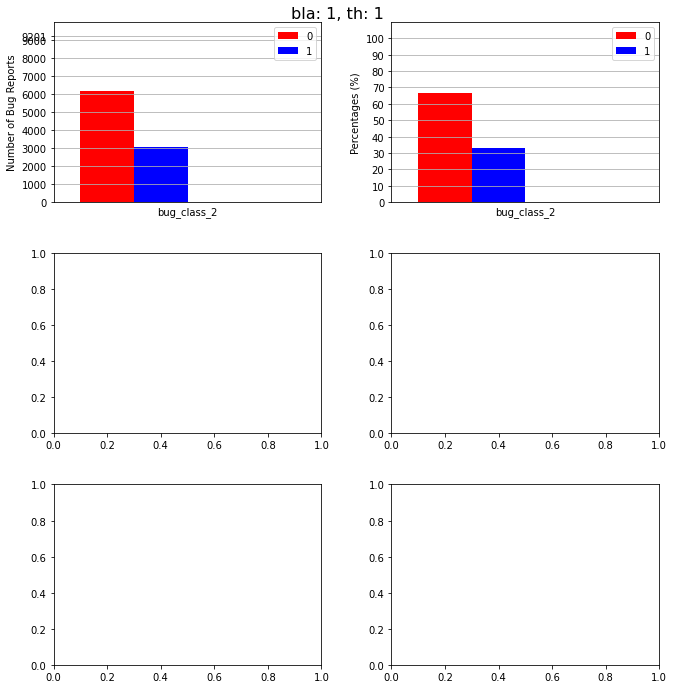

In [ ]:
num_bugs = len(bug_class_predictions)
plot_bug_class_distribution(my_bug_classes_config, 
                            num_bugs, 
                            cbcd.each_bug_class_num, 
                            cbcd.each_bug_class_per, 
                            bla=1, 
                            th=1)

# CalcNumtsNumbugs
How maney target classes does each bug have?

Or because there may be same classes but with different timestamp for a bug, is better to say:

How maney assigned timestamp does each bug have?

In [ ]:
cntsnbugs = CalcNumtsNumbugs(df_main.copy(), bug_class_predictions.copy())

In [ ]:
cntsnbugs.calc_bug_numts()
cntsnbugs.free_memory()
cntsnbugs.bug_class_predictions_numts

,bug_report_id,bug_class_2,num_ts
0,41737,0,144
1,41748,0,11
2,41751,1,1
3,41754,0,17
4,41757,0,1
...,...,...,...
9196,53949,0,2
9197,53950,0,1
9198,53951,0,1
9199,53952,0,1


In [ ]:
cntsnbugs.create_df_numts_numbugs()

# base_unts=True  means sort by unique_num_ts
# base_unts=False means sort by num_bugs
cntsnbugs.sort_df_numts_numbugs(base_unts=True) 

max_unique_num_ts, _ = cntsnbugs.find_max_numbugs_unumts_numbugs()

MAX _ unique_num_ts :
unique_num_ts    2836
num_bugs            1
Name: 165, dtype: int64
--------------------------------------------------
MAX _ num_bugs      :
unique_num_ts       1
num_bugs         3259
Name: 0, dtype: int64


In [ ]:
cntsnbugs.add_columns_bugper_cumulative()
cntsnbugs.df_numts_numbugs

,unique_num_ts,num_bugs,per_bugs,cum_num_bugs,cum_per_bugs
0,1,3259,35.0,3259,35.0
1,2,1754,19.0,5013,54.0
2,3,897,10.0,5910,64.0
3,4,562,6.0,6472,70.0
4,5,396,4.0,6868,75.0
...,...,...,...,...,...
226,1477,1,0.0,9195,100.0
227,1478,1,0.0,9196,100.0
228,1479,3,0.0,9199,100.0
112,1662,1,0.0,9200,100.0


# PlotNumtsNumbugs

In [ ]:
pntsnb = PlotNumtsNumbugs()

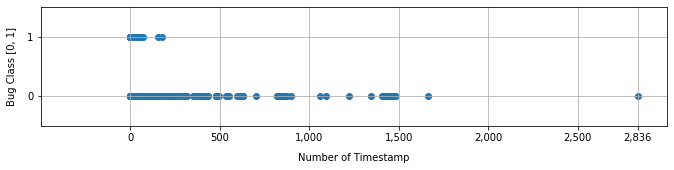

In [ ]:
pntsnb.plots_numts_bugclass(max_unique_num_ts, cntsnbugs.bug_class_predictions_numts)

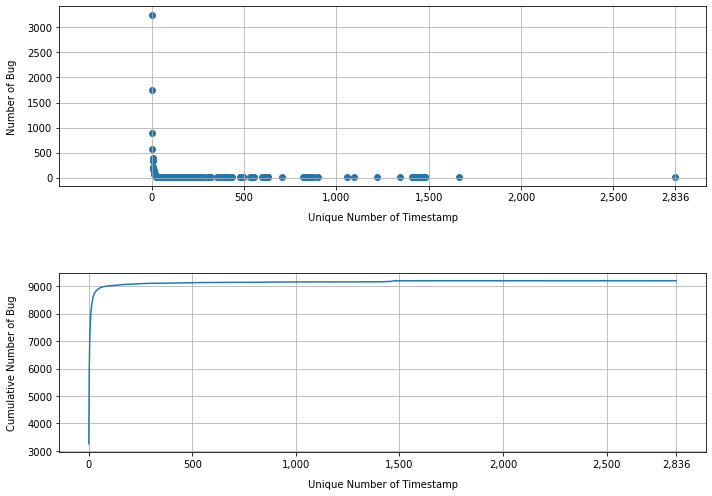

In [ ]:
pntsnb.plotdist(max_unique_num_ts, cntsnbugs.df_numts_numbugs)

# NumLabel1Dataset

In [ ]:
class NumLabel1Dataset():
    
    def __init__(self, df_main):
        self.num_label1 = 100
        self.num_ts = 5
        
        self.max_bug_label1 = 0
        self.max_bug_num_ts = 0
        self.max_bug_label1_bid = None
        
        self.bug_label1_num = {}
        self.bug_label1_perc = {}
        self.bug_label1_num_class = {}
        
        
        tempra = ["<=" + str(self.num_label1), ">" + str(self.num_label1)]
        tempra.extend(list(range(0, self.num_label1 + 1)))
        #tempra.extend(["<=", ">"])
        print(tempra)
        
        tempts = list(range(1, self.num_ts + 1))
        tempts.extend(["<="  + str(self.num_ts), ">" + str(self.num_ts)])
        print(tempts)
        
        
        for i in tempra:
            tempstr = "bug_label1_" + str(i)
            self.bug_label1_num[tempstr] = 0
            self.bug_label1_perc[tempstr] = 0
            
            self.bug_label1_num_class[tempstr] = {}
            for j in tempts:
                tempnumts = "num_ts_" + str(j)
                self.bug_label1_num_class[tempstr][tempnumts] = 0
        
    
    
    # brids: bug report ids
    # cids: class ids
    def select_brids_replace_cids(self):
        tempdf = df_main.groupby("bug_report_id")
        tempdf.apply(lambda g: self.replacement_false_(g))
        for k, percentage in self.bug_label1_perc.items():
            self.bug_label1_perc[k] = round((self.bug_label1_num[k] / len(tempdf)) * 100, 2)
    
    
    def replacement_false_(self, g):
        labels = g["label"].to_list()
        num1_label = labels.count(1)
        tempKey = None
        tempKey_small = None
        
        tempKey2 = None
        
        if num1_label > self.num_label1:
            tempKey = "bug_label1_>" + str(self.num_label1)
        else:
            tempKey_small = "bug_label1_<=" + str(self.num_label1)
            self.bug_label1_num[tempKey_small] += 1
            
            tempKey = "bug_label1_" + str(num1_label)
        
        self.bug_label1_num[tempKey] += 1
        
        # ------ num_ts
        if len(labels) > self.num_ts:
            tempKey2 = "num_ts_>" + str(self.num_ts)
        else:
            tempKey2_small = "num_ts_<=" + str(self.num_ts)
            self.bug_label1_num_class[tempKey][tempKey2_small] += 1
            
            tempKey2 = "num_ts_" + str(len(labels))
        
        self.bug_label1_num_class[tempKey][tempKey2] += 1
        if tempKey_small:
            self.bug_label1_num_class[tempKey_small][tempKey2] += 1
        
        if num1_label > self.max_bug_label1:
            self.max_bug_label1 = num1_label
            self.max_bug_num_ts = len(labels)
            self.max_bug_label1_bid = g.name

## obj

In [ ]:
a = [1, 1, -1, 0, 0, 0]
a.count(-1)

1

In [ ]:
md2 = NumLabel1Dataset(df_main.copy())

# md2.bug_label1_num_class
# md2.bug_label1_num
md2.select_brids_replace_cids()

['<=100', '>100', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, '<=5', '>5']


In [ ]:
# print(str(md.bug_timestamp_num))
for k, v in md2.bug_label1_num.items():
    print(k, v)

bug_label1_<=100 3555
bug_label1_>100 55
bug_label1_0 1399
bug_label1_1 826
bug_label1_2 392
bug_label1_3 181
bug_label1_4 117
bug_label1_5 73
bug_label1_6 58
bug_label1_7 36
bug_label1_8 39
bug_label1_9 43
bug_label1_10 31
bug_label1_11 24
bug_label1_12 17
bug_label1_13 16
bug_label1_14 9
bug_label1_15 16
bug_label1_16 11
bug_label1_17 14
bug_label1_18 11
bug_label1_19 5
bug_label1_20 7
bug_label1_21 9
bug_label1_22 5
bug_label1_23 5
bug_label1_24 3
bug_label1_25 3
bug_label1_26 5
bug_label1_27 4
bug_label1_28 5
bug_label1_29 2
bug_label1_30 3
bug_label1_31 4
bug_label1_32 4
bug_label1_33 9
bug_label1_34 2
bug_label1_35 6
bug_label1_36 5
bug_label1_37 4
bug_label1_38 9
bug_label1_39 6
bug_label1_40 6
bug_label1_41 5
bug_label1_42 11
bug_label1_43 4
bug_label1_44 4
bug_label1_45 3
bug_label1_46 3
bug_label1_47 3
bug_label1_48 4
bug_label1_49 3
bug_label1_50 4
bug_label1_51 4
bug_label1_52 3
bug_label1_53 2
bug_label1_54 4
bug_label1_55 2
bug_label1_56 4
bug_label1_57 2
bug_label1_58 1


In [ ]:
md2.bug_label1_perc

{'bug_label1_<=100': 98.48,
 'bug_label1_>100': 1.52,
 'bug_label1_0': 38.75,
 'bug_label1_1': 22.88,
 'bug_label1_2': 10.86,
 'bug_label1_3': 5.01,
 'bug_label1_4': 3.24,
 'bug_label1_5': 2.02,
 'bug_label1_6': 1.61,
 'bug_label1_7': 1.0,
 'bug_label1_8': 1.08,
 'bug_label1_9': 1.19,
 'bug_label1_10': 0.86,
 'bug_label1_11': 0.66,
 'bug_label1_12': 0.47,
 'bug_label1_13': 0.44,
 'bug_label1_14': 0.25,
 'bug_label1_15': 0.44,
 'bug_label1_16': 0.3,
 'bug_label1_17': 0.39,
 'bug_label1_18': 0.3,
 'bug_label1_19': 0.14,
 'bug_label1_20': 0.19,
 'bug_label1_21': 0.25,
 'bug_label1_22': 0.14,
 'bug_label1_23': 0.14,
 'bug_label1_24': 0.08,
 'bug_label1_25': 0.08,
 'bug_label1_26': 0.14,
 'bug_label1_27': 0.11,
 'bug_label1_28': 0.14,
 'bug_label1_29': 0.06,
 'bug_label1_30': 0.08,
 'bug_label1_31': 0.11,
 'bug_label1_32': 0.11,
 'bug_label1_33': 0.25,
 'bug_label1_34': 0.06,
 'bug_label1_35': 0.17,
 'bug_label1_36': 0.14,
 'bug_label1_37': 0.11,
 'bug_label1_38': 0.25,
 'bug_label1_39': 0.

In [ ]:
print("num cid: ", md2.max_bug_label1)
print("num ts:  ", md2.max_bug_num_ts)
print("bug id:  ", md2.max_bug_label1_bid)

num cid:  2486
num ts:   11232
bug id:   34589


In [ ]:
md2.bug_label1_num_class

{'bug_label1_<=100': {'num_ts_1': 874,
  'num_ts_2': 535,
  'num_ts_3': 303,
  'num_ts_4': 230,
  'num_ts_5': 158,
  'num_ts_<=5': 0,
  'num_ts_>5': 1455},
 'bug_label1_>100': {'num_ts_1': 0,
  'num_ts_2': 0,
  'num_ts_3': 0,
  'num_ts_4': 0,
  'num_ts_5': 0,
  'num_ts_<=5': 0,
  'num_ts_>5': 55},
 'bug_label1_0': {'num_ts_1': 671,
  'num_ts_2': 249,
  'num_ts_3': 118,
  'num_ts_4': 83,
  'num_ts_5': 54,
  'num_ts_<=5': 1175,
  'num_ts_>5': 224},
 'bug_label1_1': {'num_ts_1': 203,
  'num_ts_2': 211,
  'num_ts_3': 116,
  'num_ts_4': 69,
  'num_ts_5': 43,
  'num_ts_<=5': 642,
  'num_ts_>5': 184},
 'bug_label1_2': {'num_ts_1': 0,
  'num_ts_2': 75,
  'num_ts_3': 53,
  'num_ts_4': 54,
  'num_ts_5': 38,
  'num_ts_<=5': 220,
  'num_ts_>5': 172},
 'bug_label1_3': {'num_ts_1': 0,
  'num_ts_2': 0,
  'num_ts_3': 16,
  'num_ts_4': 21,
  'num_ts_5': 14,
  'num_ts_<=5': 51,
  'num_ts_>5': 130},
 'bug_label1_4': {'num_ts_1': 0,
  'num_ts_2': 0,
  'num_ts_3': 0,
  'num_ts_4': 3,
  'num_ts_5': 7,
  'nu

# test